<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/improving_neural_network/data_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (3).csv


{'Social_Network_Ads (3).csv': b'Age,EstimatedSalary,Purchased\r\n19,19000,0\r\n35,20000,0\r\n26,43000,0\r\n27,57000,0\r\n19,76000,0\r\n27,58000,0\r\n27,84000,0\r\n32,150000,1\r\n25,33000,0\r\n35,65000,0\r\n26,80000,0\r\n26,52000,0\r\n20,86000,0\r\n32,18000,0\r\n18,82000,0\r\n29,80000,0\r\n47,25000,1\r\n45,26000,1\r\n46,28000,1\r\n48,29000,1\r\n45,22000,1\r\n47,49000,1\r\n48,41000,1\r\n45,22000,1\r\n46,23000,1\r\n47,20000,1\r\n49,28000,1\r\n47,30000,1\r\n29,43000,0\r\n31,18000,0\r\n31,74000,0\r\n27,137000,1\r\n21,16000,0\r\n28,44000,0\r\n27,90000,0\r\n35,27000,0\r\n33,28000,0\r\n30,49000,0\r\n26,72000,0\r\n27,31000,0\r\n27,17000,0\r\n33,51000,0\r\n35,108000,0\r\n30,15000,0\r\n28,84000,0\r\n23,20000,0\r\n25,79000,0\r\n27,54000,0\r\n30,135000,1\r\n31,89000,0\r\n24,32000,0\r\n18,44000,0\r\n29,83000,0\r\n35,23000,0\r\n27,58000,0\r\n24,55000,0\r\n23,48000,0\r\n28,79000,0\r\n22,18000,0\r\n32,117000,0\r\n27,20000,0\r\n25,87000,0\r\n23,66000,0\r\n32,120000,1\r\n59,83000,0\r\n24,58000,0\r\n24,1

In [84]:
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [86]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [87]:
x = df.iloc[:, 0:2]
y = df.iloc[:, 2]

In [88]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [89]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

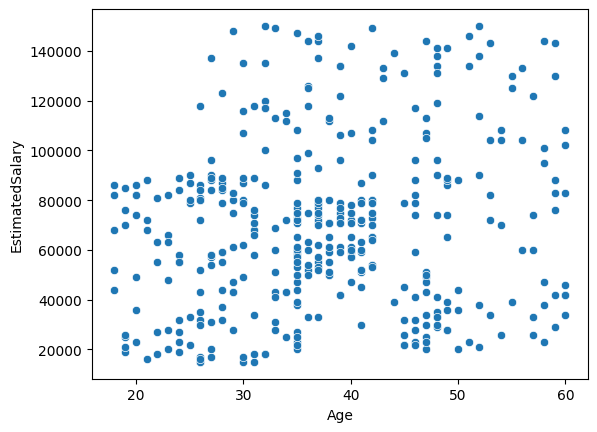

In [90]:
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1])

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [93]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(2, )),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6143 - loss: 1213.7826 - val_accuracy: 0.3500 - val_loss: 605.6725
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4371 - loss: 383.7220 - val_accuracy: 0.6500 - val_loss: 342.3570
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5048 - loss: 269.8145 - val_accuracy: 0.6500 - val_loss: 108.8763
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5964 - loss: 225.6904 - val_accuracy: 0.3500 - val_loss: 256.1213
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4500 - loss: 183.8883 - val_accuracy: 0.6500 - val_loss: 62.5505
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4958 - loss: 89.9254 - val_accuracy: 0.6500 - val_loss: 70.1390
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4830 - loss: 59.5255 - val_accuracy: 0.3500 - val_loss: 30.8274
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5565 - loss: 26

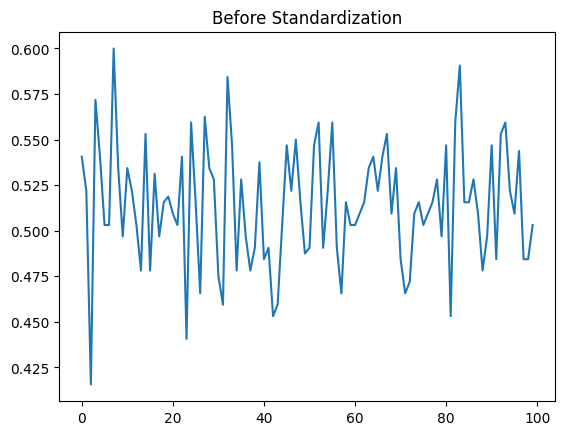

In [97]:
import matplotlib.pyplot as plt
plt.title('Before Standardization')
plt.plot(history.history['accuracy'])

Applying Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<Axes: >

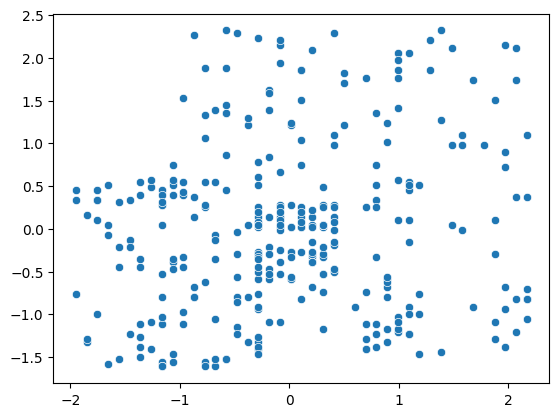

In [100]:
sns.scatterplot(x=x_train_scaled[:, 0], y=x_train_scaled[:, 1])

In [101]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(2, )),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100, verbose=0)

Text(0.5, 1.0, 'After Standardization')

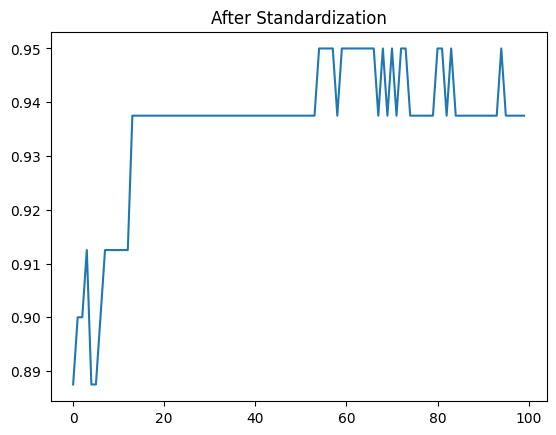

In [104]:
plt.plot(history.history['val_accuracy'])
plt.title("After Standardization")